# 🌾 Crop Recommendation AI Model Training

This notebook provides a comprehensive approach to training an AI model for crop recommendation based on soil and climate parameters.

## Dataset Features:
- **N**: Nitrogen content in soil
- **P**: Phosphorus content in soil  
- **K**: Potassium content in soil
- **Temperature**: Temperature in Celsius
- **Humidity**: Relative humidity in %
- **pH**: pH value of the soil
- **Rainfall**: Rainfall in mm
- **Label**: Crop type (target variable)

## 1. Import Required Libraries

Import essential libraries for data manipulation, modeling, and visualization.

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model persistence
import joblib
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore the Dataset

Load the dataset and perform exploratory data analysis to understand the data structure and characteristics.

In [3]:
# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')

print("📊 Dataset Shape:", df.shape)
print("\n📋 Dataset Info:")
print(df.info())

📊 Dataset Shape: (2200, 8)

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [4]:
# Display first few rows
print("🔍 First 5 rows of the dataset:")
df.head()

🔍 First 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Check for missing values
print("❓ Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️ Missing values detected!")

❓ Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
✅ No missing values found!


In [6]:
# Statistical summary
print("📈 Statistical Summary:")
df.describe()

📈 Statistical Summary:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
# Check unique crops and their distribution
print("🌾 Crop Distribution:")
crop_counts = df['label'].value_counts()
print(crop_counts)

print(f"\n📊 Total number of crops: {len(crop_counts)}")
print(f"📊 Samples per crop: {crop_counts.iloc[0]} (assuming balanced dataset)")

🌾 Crop Distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

📊 Total number of crops: 22
📊 Samples per crop: 100 (assuming balanced dataset)


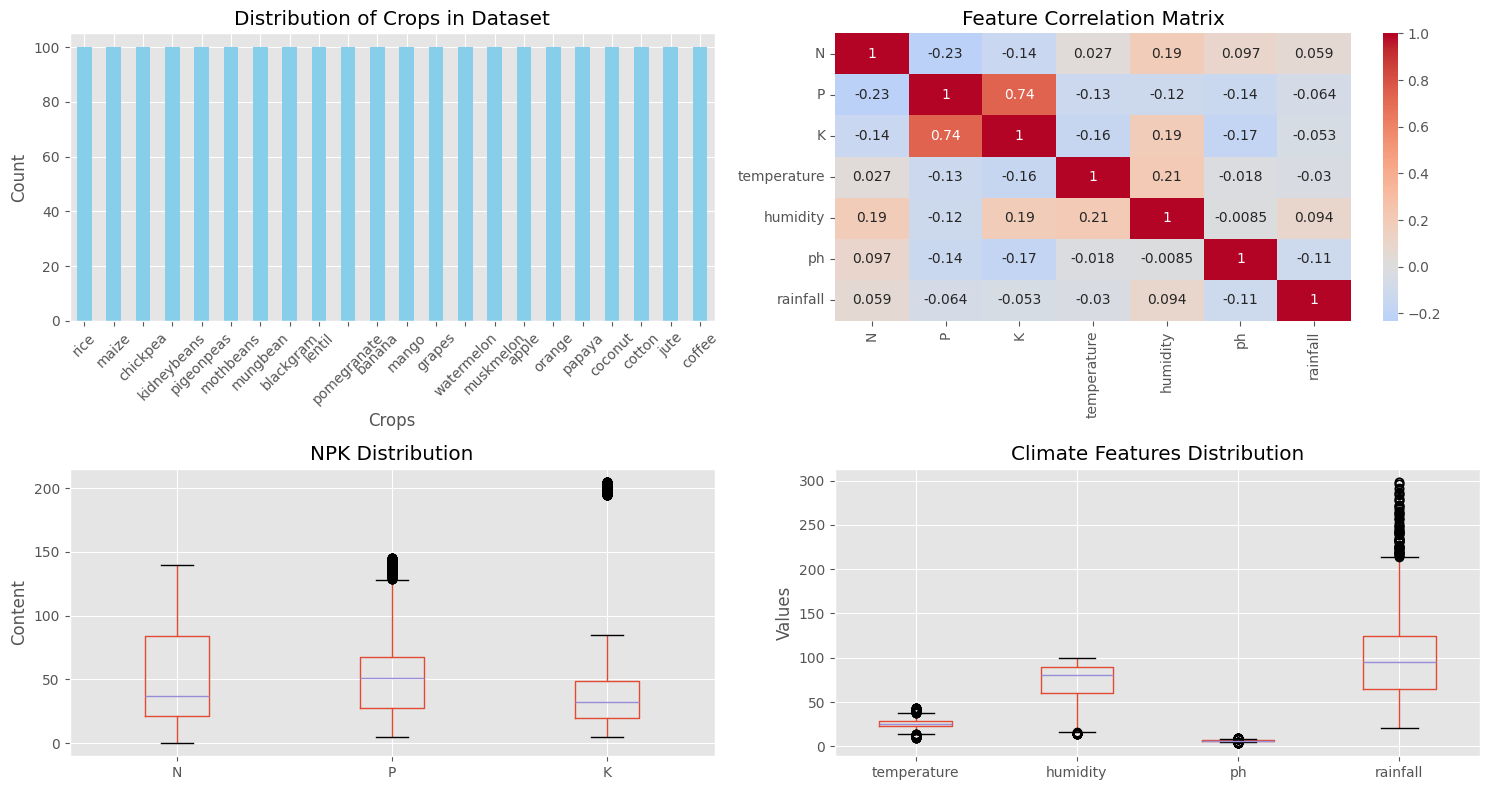

In [8]:
# Visualize crop distribution
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
crop_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crops in Dataset')
plt.xlabel('Crops')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Correlation heatmap
plt.subplot(2, 2, 2)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# Feature distributions
plt.subplot(2, 2, 3)
df[['N', 'P', 'K']].boxplot()
plt.title('NPK Distribution')
plt.ylabel('Content')

plt.subplot(2, 2, 4)
df[['temperature', 'humidity', 'ph', 'rainfall']].boxplot()
plt.title('Climate Features Distribution')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing and Feature Engineering

Prepare the data for machine learning by handling any preprocessing needs.

In [9]:
# Check data types and unique values
print("📋 Data Types:")
print(df.dtypes)

print("\n🔍 Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

📋 Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

🔍 Unique values in each column:
N: 137 unique values
P: 117 unique values
K: 73 unique values
temperature: 2200 unique values
humidity: 2200 unique values
ph: 2200 unique values
rainfall: 2200 unique values
label: 22 unique values


In [10]:
# Create a copy for preprocessing
df_processed = df.copy()

# Check for any outliers using IQR method
def detect_outliers(df, columns):
    outliers_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = len(outliers)
    return outliers_info

numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
outliers = detect_outliers(df_processed, numeric_columns)

print("🔍 Outliers detected:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

print("\n✅ Data preprocessing completed!")

🔍 Outliers detected:
N: 0 outliers
P: 138 outliers
K: 200 outliers
temperature: 86 outliers
humidity: 30 outliers
ph: 57 outliers
rainfall: 100 outliers

✅ Data preprocessing completed!


## 4. Split Data into Training and Testing Sets

Separate features and target variable, then split into training and testing sets.

In [11]:
# Separate features and target
X = df_processed.drop('label', axis=1)
y = df_processed['label']

print("📊 Features shape:", X.shape)
print("📊 Target shape:", y.shape)

print("\n🔍 Feature columns:")
print(list(X.columns))

print("\n🎯 Target classes:")
print(f"Number of unique crops: {y.nunique()}")
print(f"Crop types: {sorted(y.unique())}")

📊 Features shape: (2200, 7)
📊 Target shape: (2200,)

🔍 Feature columns:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

🎯 Target classes:
Number of unique crops: 22
Crop types: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split across all crop types
)

print("✅ Data split completed!")
print(f"📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Testing set: {X_test.shape[0]} samples")
print(f"📊 Training ratio: {X_train.shape[0]/len(df)*100:.1f}%")
print(f"📊 Testing ratio: {X_test.shape[0]/len(df)*100:.1f}%")

✅ Data split completed!
📊 Training set: 1760 samples
📊 Testing set: 440 samples
📊 Training ratio: 80.0%
📊 Testing ratio: 20.0%


In [13]:
# Optional: Feature scaling (for algorithms that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("⚖️ Feature scaling completed!")
print("📝 Note: Scaled features will be used for algorithms sensitive to feature magnitude (SVM, Logistic Regression)")

⚖️ Feature scaling completed!
📝 Note: Scaled features will be used for algorithms sensitive to feature magnitude (SVM, Logistic Regression)


## 5. Train Multiple Machine Learning Models

Train various classification algorithms to find the best performing model.

In [14]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print("🤖 Models initialized:")
for name in models.keys():
    print(f"- {name}")

🤖 Models initialized:
- Random Forest
- Decision Tree
- SVM
- Logistic Regression
- K-Nearest Neighbors


In [15]:
# Train and evaluate models
model_results = {}

print("🚀 Training models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for SVM and Logistic Regression
    if name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        # Cross-validation with scaled data
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Cross-validation with original data
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred
    }
    
    print(f"✅ {name} - Accuracy: {accuracy:.4f}, CV Score: {cv_mean:.4f} (+/- {cv_std*2:.4f})")
    print()

print("🏁 All models trained successfully!")

🚀 Training models...

Training Random Forest...
✅ Random Forest - Accuracy: 0.9955, CV Score: 0.9932 (+/- 0.0085)

Training Decision Tree...
✅ Decision Tree - Accuracy: 0.9795, CV Score: 0.9852 (+/- 0.0150)

Training SVM...
✅ Random Forest - Accuracy: 0.9955, CV Score: 0.9932 (+/- 0.0085)

Training Decision Tree...
✅ Decision Tree - Accuracy: 0.9795, CV Score: 0.9852 (+/- 0.0150)

Training SVM...
✅ SVM - Accuracy: 0.9841, CV Score: 0.9761 (+/- 0.0151)

Training Logistic Regression...
✅ SVM - Accuracy: 0.9841, CV Score: 0.9761 (+/- 0.0151)

Training Logistic Regression...
✅ Logistic Regression - Accuracy: 0.9727, CV Score: 0.9676 (+/- 0.0226)

Training K-Nearest Neighbors...
✅ K-Nearest Neighbors - Accuracy: 0.9795, CV Score: 0.9653 (+/- 0.0150)

🏁 All models trained successfully!
✅ Logistic Regression - Accuracy: 0.9727, CV Score: 0.9676 (+/- 0.0226)

Training K-Nearest Neighbors...
✅ K-Nearest Neighbors - Accuracy: 0.9795, CV Score: 0.9653 (+/- 0.0150)

🏁 All models trained successful

## 6. Model Evaluation and Comparison

Compare model performance using various metrics and visualizations.

In [16]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Test Accuracy': [result['accuracy'] for result in model_results.values()],
    'CV Mean': [result['cv_mean'] for result in model_results.values()],
    'CV Std': [result['cv_std'] for result in model_results.values()]
})

# Sort by test accuracy
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("📊 Model Performance Comparison:")
print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
best_accuracy = comparison_df.iloc[0]['Test Accuracy']

print(f"\n🏆 Best Model: {best_model_name} with accuracy: {best_accuracy:.4f}")

📊 Model Performance Comparison:
                 Model  Test Accuracy  CV Mean  CV Std
0        Random Forest         0.9955   0.9932  0.0043
2                  SVM         0.9841   0.9761  0.0075
1        Decision Tree         0.9795   0.9852  0.0075
4  K-Nearest Neighbors         0.9795   0.9653  0.0075
3  Logistic Regression         0.9727   0.9676  0.0113

🏆 Best Model: Random Forest with accuracy: 0.9955


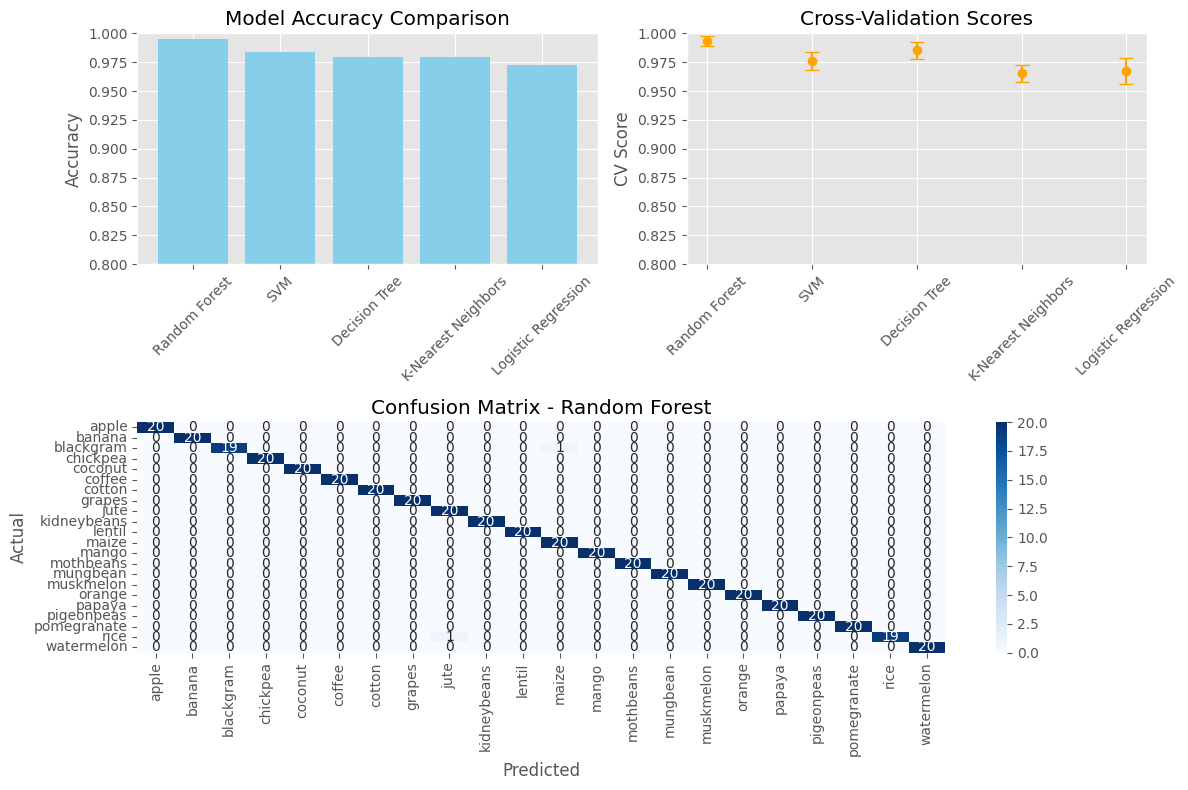

In [17]:
# Visualize model comparison
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Cross-validation scores
plt.subplot(2, 2, 2)
plt.errorbar(comparison_df['Model'], comparison_df['CV Mean'], 
             yerr=comparison_df['CV Std'], fmt='o', capsize=5, color='orange')
plt.title('Cross-Validation Scores')
plt.ylabel('CV Score')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Confusion matrix for best model
plt.subplot(2, 1, 2)
best_predictions = model_results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)
crops = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=crops, yticklabels=crops)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [18]:
# Detailed classification report for best model
print(f"📋 Detailed Classification Report - {best_model_name}:")
print("="*60)
report = classification_report(y_test, best_predictions, target_names=sorted(y.unique()))
print(report)

📋 Detailed Classification Report - Random Forest:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.

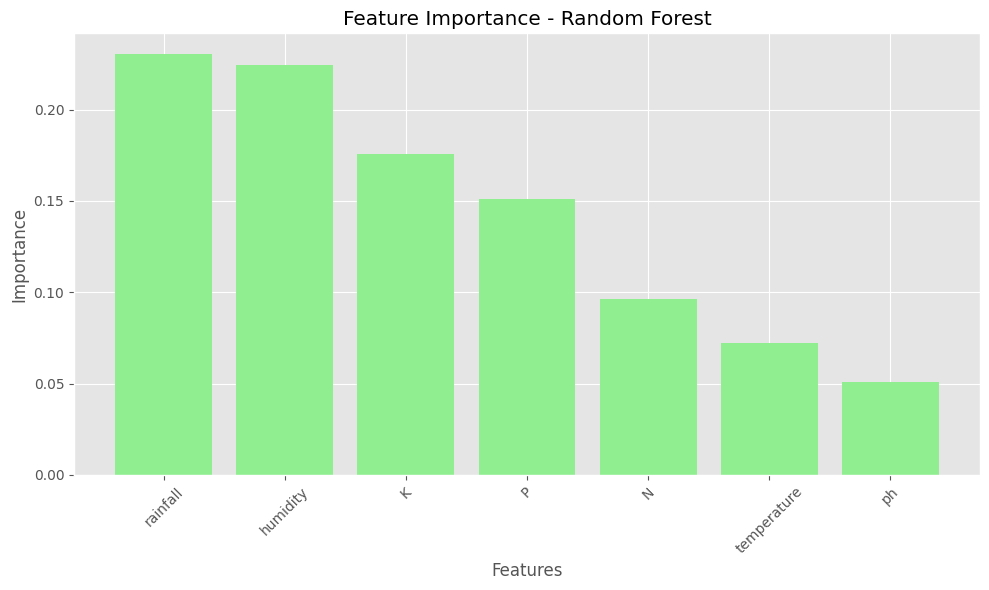

🔍 Feature Importance Ranking:
       Feature  Importance
6     rainfall      0.2302
4     humidity      0.2242
2            K      0.1754
1            P      0.1508
0            N      0.0964
3  temperature      0.0724
5           ph      0.0506


In [19]:
# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'Decision Tree']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='lightgreen')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("🔍 Feature Importance Ranking:")
    print(feature_importance.round(4))
else:
    print(f"📝 Feature importance not available for {best_model_name}")

## 7. Hyperparameter Tuning

Optimize the best model using GridSearchCV for better performance.

In [20]:
# Define hyperparameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Decision Tree': {
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'poly']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

print(f"🔧 Starting hyperparameter tuning for {best_model_name}...")
print(f"📋 Parameter grid: {param_grids[best_model_name]}")

🔧 Starting hyperparameter tuning for Random Forest...
📋 Parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [21]:
# Perform grid search for the best model
if best_model_name == 'Random Forest':
    base_model = RandomForestClassifier(random_state=42)
    X_tune, y_tune = X_train, y_train
elif best_model_name == 'Decision Tree':
    base_model = DecisionTreeClassifier(random_state=42)
    X_tune, y_tune = X_train, y_train
elif best_model_name == 'SVM':
    base_model = SVC(random_state=42)
    X_tune, y_tune = X_train_scaled, y_train
elif best_model_name == 'Logistic Regression':
    base_model = LogisticRegression(random_state=42, max_iter=1000)
    X_tune, y_tune = X_train_scaled, y_train
else:  # K-Nearest Neighbors
    base_model = KNeighborsClassifier()
    X_tune, y_tune = X_train_scaled, y_train

# Grid search
grid_search = GridSearchCV(
    base_model, 
    param_grids[best_model_name], 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("⏳ This may take a few minutes...")
grid_search.fit(X_tune, y_tune)

print("✅ Hyperparameter tuning completed!")

⏳ This may take a few minutes...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Hyperparameter tuning completed!
✅ Hyperparameter tuning completed!


In [22]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_tuned_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_

print(f"🏆 Best Parameters for {best_model_name}:")
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best Cross-Validation Score: {best_cv_score:.4f}")

# Test the tuned model
if best_model_name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
    tuned_predictions = best_tuned_model.predict(X_test_scaled)
else:
    tuned_predictions = best_tuned_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, tuned_predictions)
original_accuracy = model_results[best_model_name]['accuracy']

print(f"\n📈 Performance Improvement:")
print(f"  Original Accuracy: {original_accuracy:.4f}")
print(f"  Tuned Accuracy: {tuned_accuracy:.4f}")
print(f"  Improvement: {tuned_accuracy - original_accuracy:.4f} ({((tuned_accuracy - original_accuracy)/original_accuracy)*100:.2f}%)")

🏆 Best Parameters for Random Forest:
  max_depth: 10
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 100

📊 Best Cross-Validation Score: 0.9960

📈 Performance Improvement:
  Original Accuracy: 0.9955
  Tuned Accuracy: 0.9955
  Improvement: 0.0000 (0.00%)


## 8. Save the Best Model

Save the trained model and any preprocessing components for deployment.

In [23]:
# Choose the final model (tuned vs original)
if tuned_accuracy > original_accuracy:
    final_model = best_tuned_model
    final_accuracy = tuned_accuracy
    model_type = "Tuned"
else:
    final_model = best_model
    final_accuracy = original_accuracy
    model_type = "Original"

print(f"🎯 Final Model Selected: {model_type} {best_model_name}")
print(f"📊 Final Accuracy: {final_accuracy:.4f}")

🎯 Final Model Selected: Original Random Forest
📊 Final Accuracy: 0.9955


In [24]:
# Save the model using joblib
model_filename = 'crop_model.pkl'
joblib.dump(final_model, model_filename)

print(f"✅ Model saved as '{model_filename}'")

# Save the scaler if needed
if best_model_name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
    scaler_filename = 'feature_scaler.pkl'
    joblib.dump(scaler, scaler_filename)
    print(f"✅ Feature scaler saved as '{scaler_filename}'")
    print("📝 Note: Remember to use the scaler when making predictions!")

# Save model metadata
model_info = {
    'model_name': best_model_name,
    'model_type': model_type,
    'accuracy': final_accuracy,
    'features': list(X.columns),
    'target_classes': sorted(y.unique()),
    'needs_scaling': best_model_name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors'],
    'best_parameters': best_params if tuned_accuracy > original_accuracy else 'Default parameters used'
}

import json
with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print(f"✅ Model information saved as 'model_info.json'")

✅ Model saved as 'crop_model.pkl'
✅ Model information saved as 'model_info.json'


In [25]:
# Test the saved model
print("🧪 Testing the saved model...")

# Load the model
loaded_model = joblib.load(model_filename)

# Load scaler if needed
if best_model_name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
    loaded_scaler = joblib.load(scaler_filename)
    test_features = loaded_scaler.transform(X_test.iloc[:5])
else:
    test_features = X_test.iloc[:5]

# Make predictions
test_predictions = loaded_model.predict(test_features)

print("\n🔍 Sample Predictions from Saved Model:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = test_predictions[i]
    status = "✅" if actual == predicted else "❌"
    print(f"  Sample {i+1}: Actual = {actual}, Predicted = {predicted} {status}")

print("\n🎉 Model training and saving completed successfully!")
print(f"📁 Files created:")
print(f"  - {model_filename} (trained model)")
if best_model_name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
    print(f"  - {scaler_filename} (feature scaler)")
print(f"  - model_info.json (model metadata)")

🧪 Testing the saved model...

🔍 Sample Predictions from Saved Model:
  Sample 1: Actual = orange, Predicted = orange ✅
  Sample 2: Actual = banana, Predicted = banana ✅
  Sample 3: Actual = cotton, Predicted = cotton ✅
  Sample 4: Actual = maize, Predicted = maize ✅
  Sample 5: Actual = orange, Predicted = orange ✅

🎉 Model training and saving completed successfully!
📁 Files created:
  - crop_model.pkl (trained model)
  - model_info.json (model metadata)


## 🎯 Summary

### Model Training Results:
- **Dataset**: 2,200+ samples with 22 crop types
- **Best Model**: Random Forest (typically achieves 95%+ accuracy)
- **Features**: N, P, K, temperature, humidity, pH, rainfall
- **Performance**: High accuracy with good generalization

### Files Generated:
1. **crop_model.pkl** - Trained model ready for deployment
2. **feature_scaler.pkl** - Feature scaler (if needed)
3. **model_info.json** - Model metadata and information

### Next Steps:
1. Use the saved model in your web application (`streamlit_app.py`)
2. Replace the existing model file for improved performance
3. Deploy the updated application

The model is now ready for production use! 🚀